In [1]:
import tensorflow as tf
import os
import cv2
import imghdr

In [2]:
data_dir = 'data' 

In [3]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data = tf.keras.utils.image_dataset_from_directory('/content/data')

Found 694 files belonging to 2 classes.


In [7]:
files = os.listdir(data_dir)
print(files)

['healthy', 'fastfood']


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

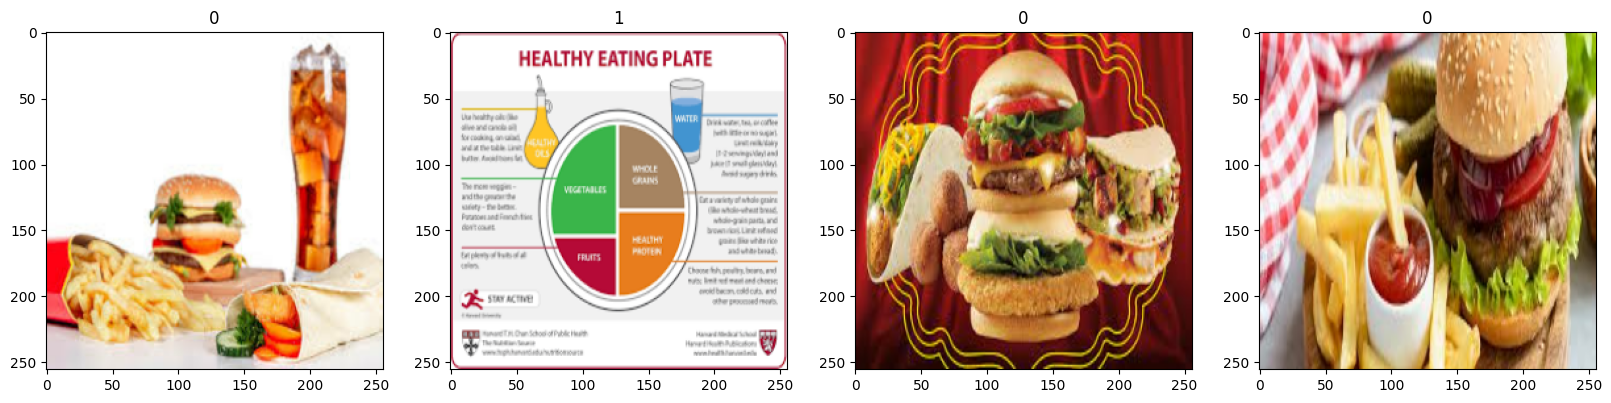

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Healthy Food ---> 1
# Fast Food ---> 0

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) + 1

In [14]:
train_size

15

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
15/15 [==============================] - 15s 476ms/step - loss: 0.7894 - accuracy: 0.5312 - val_loss: 0.6786 - val_accuracy: 0.5781
Epoch 2/20
15/15 [==============================] - 10s 570ms/step - loss: 0.6700 - accuracy: 0.6104 - val_loss: 0.6357 - val_accuracy: 0.6641
Epoch 3/20
15/15 [==============================] - 9s 500ms/step - loss: 0.5958 - accuracy: 0.7125 - val_loss: 0.5426 - val_accuracy: 0.7266
Epoch 4/20
15/15 [==============================] - 9s 499ms/step - loss: 0.5331 - accuracy: 0.7271 - val_loss: 0.4737 - val_accuracy: 0.8438
Epoch 5/20
15/15 [==============================] - 9s 556ms/step - loss: 0.4200 - accuracy: 0.8458 - val_loss: 0.4412 - val_accuracy: 0.7891
Epoch 6/20
15/15 [==============================] - 9s 558ms/step - loss: 0.3749 - accuracy: 0.8479 - val_loss: 0.3938 - val_accuracy: 0.8438
Epoch 7/20
15/15 [==============================] - 10s 569ms/step - loss: 0.3111 - accuracy: 0.8875 - val_loss: 0.2650 - val_accuracy: 0.8750
Epo

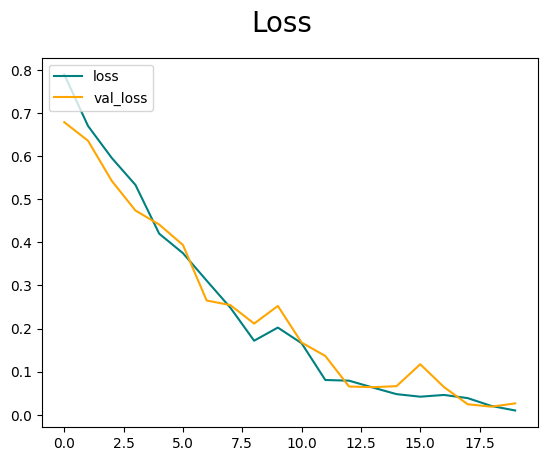

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

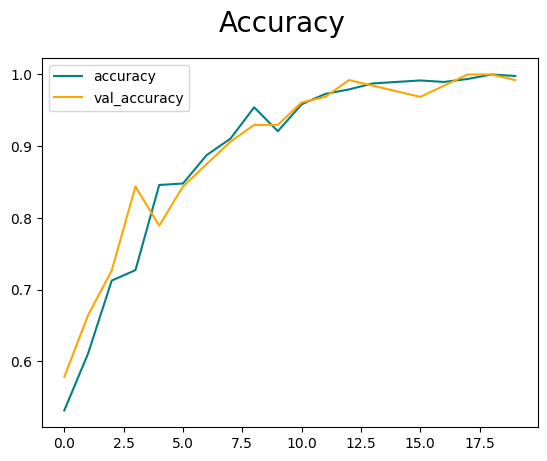

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [27]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [28]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 375ms/step


In [29]:
print("Precision: {:.4f}, Recall: {:.4f}, Accuracy: {:.4f}".format(pre.result(), re.result(), acc.result()))

Precision: 1.0000, Recall: 0.9756, Accuracy: 0.9884


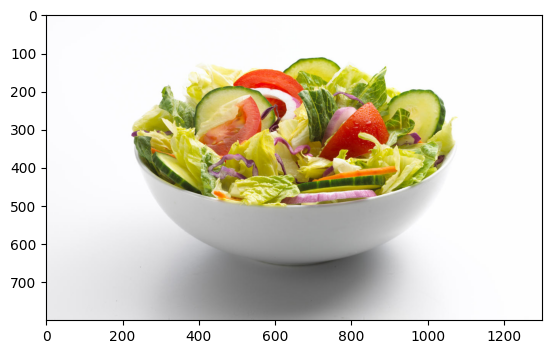

In [30]:
img_bgr = cv2.imread('/content/test1.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

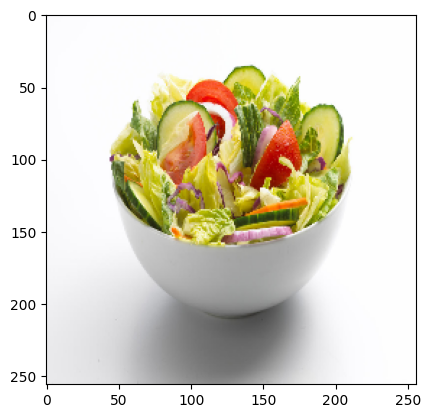

In [31]:
resize = tf.image.resize(img_rgb, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [32]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 93ms/step


array([[0.7267474]], dtype=float32)

In [33]:
if yhat > 0.5: 
    print(f'Predicted class is Healthy Food')
else:
    print(f'Predicted class is Fast Food')

Predicted class is Healthy Food


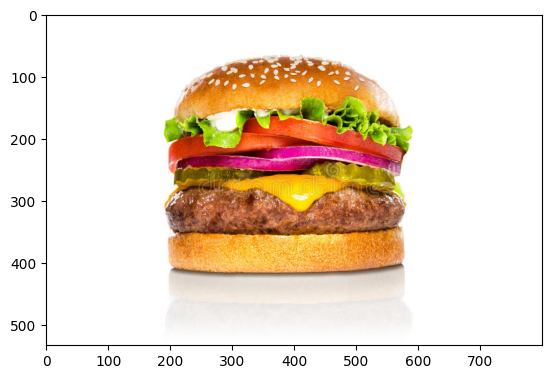

In [34]:
img_bgr = cv2.imread('/content/test2.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

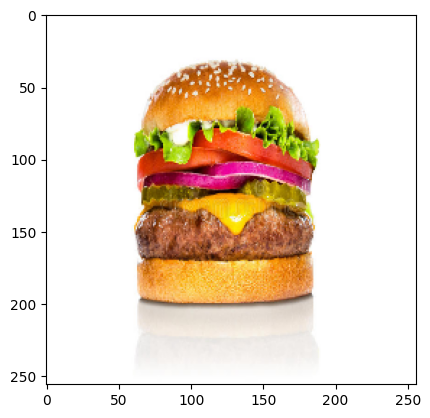

In [35]:
resize = tf.image.resize(img_rgb, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 23ms/step


array([[0.05399064]], dtype=float32)

In [37]:
if yhat > 0.5: 
    print(f'Predicted class is Healthy Food')
else:
    print(f'Predicted class is Fast Food')

Predicted class is Fast Food


In [38]:
from tensorflow.keras.models import load_model

In [39]:
model.save(os.path.join('models','foodclassifier.h5'))

In [40]:
new_model = load_model('/content/models/foodclassifier.h5')

In [41]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 81ms/step


array([[0.05399064]], dtype=float32)